# Problem 1

In [2]:
#import data
import pandas as pd
benchmark = pd.read_csv('benchmarks.csv', sep=",",header=0)
summaries = pd.read_csv('summaries.csv', sep=",",header=0)
benchmark.head

<bound method NDFrame.head of                         testID       benchName    base  peak
0         cpu95-19990104-03254     101.tomcatv   19.40  27.1
1         cpu95-19990104-03254        102.swim   27.20  34.8
2         cpu95-19990104-03254      103.su2cor   10.10  9.98
3         cpu95-19990104-03254     104.hydro2d    8.58  8.61
4         cpu95-19990104-03254       107.mgrid    8.94  9.44
...                        ...             ...     ...   ...
136990  cpu2006-20120102-19319  462.libquantum  418.00   418
136991  cpu2006-20120102-19319     464.h264ref   46.10  50.1
136992  cpu2006-20120102-19319     471.omnetpp   19.10  20.2
136993  cpu2006-20120102-19319       473.astar   21.10  21.1
136994  cpu2006-20120102-19319   483.xalancbmk   28.80  28.8

[136995 rows x 4 columns]>

In [3]:
summaries.head(10)

,testID,tester,machine,cpu,mhz,hwAvail,os,compiler,autoParallel,benchType,base,peak
0,cpu95-19990104-03254,Dell,Precision WorkStation 610 (450MHz),450 MHz Pentium II XEON,450.0,Jan-1999,Microsoft Windows NT 4.0 sp3,Intel Fortran Compiler 2.4,No,CFP95,13.9,15.2
1,cpu95-19990104-03256,Dell,Precision WorkStation 610 (450MHz),450 MHz Pentium II XEON,450.0,Jan-1999,Microsoft Windows NT 4.0 sp3,"Intel C Compiler 2.4 for Windows NT, Microsoft...",No,CINT95,19.0,19.0
2,cpu95-19990118-03257,"Siemens, Germany",CELSIUS 2000,Pentium II Xeon Processor 450 MHz,450.0,Nov-1998,Windows NT V4.0 (Service Pack 3),Intel C Compiler Plug-In 2.4,No,CINT95,18.9,18.9
3,cpu95-19990118-03258,"Siemens, Germany",CELSIUS 2000,Pentium II Xeon Processor 450 MHz,450.0,Nov-1998,Windows NT V4.0 (Service Pack 4),Intel Fortran Compiler Plug-In 2.4,No,CFP95,13.5,15.0
4,cpu95-19990122-03268,"Sun, Palo Alto",Sun Enterprise 3500,400MHz UltraSPARC II,400.0,Dec-1998,Solaris 2.7,Sun C 5.0,No,CINT95,14.3,17.7
5,cpu95-19990122-03281,"Sun, Palo Alto",Sun Enterprise 3500,400MHz UltraSPARC II,400.0,Dec-1998,Solaris 2.7,Sun F77 5.0,No,CFP95,22.5,25.4
6,cpu95-19990122-03282,"Sun, Palo Alto",Sun Enterprise 3500,400MHz UltraSPARC II,400.0,Dec-1998,Solaris 2.7,Sun F77 5.0,No,CFP95,29.0,33.3
7,cpu95-19990122-03283,"Sun, Palo Alto",Sun Enterprise 3500,400MHz UltraSPARC II,400.0,Dec-1998,Solaris 2.7,Sun F77 5.0,No,CFP95,37.3,42.8
8,cpu95-19990122-03284,"Sun, Palo Alto",Sun Enterprise 3500,400MHz UltraSPARC II,400.0,Dec-1998,Solaris 2.7,Sun F77 5.0,No,CFP95,41.6,47.6
9,cpu95-19990122-03285,"Sun, Palo Alto",Sun Enterprise 3500,400MHz UltraSPARC II,400.0,Dec-1998,Solaris 2.7,Sun F77 5.0,No,CFP95,44.0,50.1


In [4]:
#merge 2 datasets using testID as a key
df = pd.merge(benchmark, summaries, on='testID')

#select necessary columns
df = df[['testID', 'base_x', 'benchName', 'hwAvail']]

#column 'base' in the first table was changed to base_x as summaries table also has another 'base' column. 
# And we just need to replace the name base_x with 'base' to avoid confusion
df.rename(columns={'base_x': 'base'}, inplace=True)
df.head

<bound method NDFrame.head of                         testID    base       benchName   hwAvail
0         cpu95-19990104-03254   19.40     101.tomcatv  Jan-1999
1         cpu95-19990104-03254   27.20        102.swim  Jan-1999
2         cpu95-19990104-03254   10.10      103.su2cor  Jan-1999
3         cpu95-19990104-03254    8.58     104.hydro2d  Jan-1999
4         cpu95-19990104-03254    8.94       107.mgrid  Jan-1999
...                        ...     ...             ...       ...
136990  cpu2006-20120102-19319  418.00  462.libquantum  May-2011
136991  cpu2006-20120102-19319   46.10     464.h264ref  May-2011
136992  cpu2006-20120102-19319   19.10     471.omnetpp  May-2011
136993  cpu2006-20120102-19319   21.10       473.astar  May-2011
136994  cpu2006-20120102-19319   28.80   483.xalancbmk  May-2011

[136995 rows x 4 columns]>

In [5]:
import datetime as datetime

#convert month as a string to number
def month_convert(month_name):
    datetime_object = datetime.datetime.strptime(month_name, "%b")
    return datetime_object.month

#convert time (month-Year) to datetime format
def dt(x):
    date_string = x.split('-')
    year = date_string[1]
    month = date_string[0]
    now = datetime.date(int(year), month_convert(month), 1)
    return now

In [6]:
#create a new column called 'Date' which is the datetime-formated version of 'hwAvail' columns
df['Date'] = df.hwAvail.apply(dt)
df.head

<bound method NDFrame.head of                         testID    base       benchName   hwAvail        Date
0         cpu95-19990104-03254   19.40     101.tomcatv  Jan-1999  1999-01-01
1         cpu95-19990104-03254   27.20        102.swim  Jan-1999  1999-01-01
2         cpu95-19990104-03254   10.10      103.su2cor  Jan-1999  1999-01-01
3         cpu95-19990104-03254    8.58     104.hydro2d  Jan-1999  1999-01-01
4         cpu95-19990104-03254    8.94       107.mgrid  Jan-1999  1999-01-01
...                        ...     ...             ...       ...         ...
136990  cpu2006-20120102-19319  418.00  462.libquantum  May-2011  2011-05-01
136991  cpu2006-20120102-19319   46.10     464.h264ref  May-2011  2011-05-01
136992  cpu2006-20120102-19319   19.10     471.omnetpp  May-2011  2011-05-01
136993  cpu2006-20120102-19319   21.10       473.astar  May-2011  2011-05-01
136994  cpu2006-20120102-19319   28.80   483.xalancbmk  May-2011  2011-05-01

[136995 rows x 5 columns]>

In [7]:
import numpy as np

#filter data by '101.tomcatv' benchName
tom = df[df.benchName == '101.tomcatv']
#the furthest date in the dataset
first_date = min(df.Date)
#X is the difference between any date in 'Date' column with the furthest date in whole dataset
X = tom.Date.apply(lambda x: (x - first_date).days)
#Y is the log of the base column
Y = np.log(tom.base)

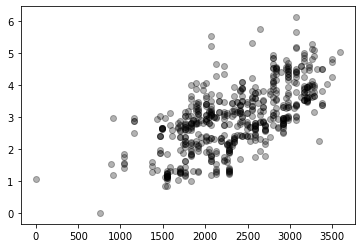

In [9]:
#scatter plot of X and Y
import matplotlib.pyplot as plt
plt.scatter(X, Y,  color='black', alpha = 0.3)


In [15]:
from sklearn import datasets, linear_model, metrics, model_selection


regr = linear_model.LinearRegression()
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 11)
# Train the model using the training sets
# x = np.array().reshape(-1,1)
# y = np.array(df['base']).reshape(-1,1)
regr.fit(X_train,y_train)
predict = regr.predict(X_test)

print('Coef and intercept of the model are: ', regr.coef_, regr.intercept_)



Coef and intercept of the model are:  [[0.00115857]] [0.24656819]


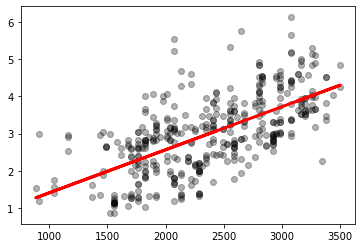

In [16]:
plt.scatter(X_train,y_train,  color='black', alpha = 0.3)

plt.plot(X_train,regr.predict(X_train), linewidth = 3, color = 'red')



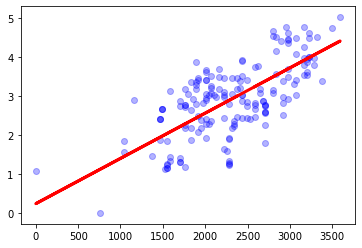

In [17]:
plt.scatter(X_test,y_test,  color='blue', alpha = 0.3)
plt.plot(X_test,predict, linewidth = 3, color = 'red')

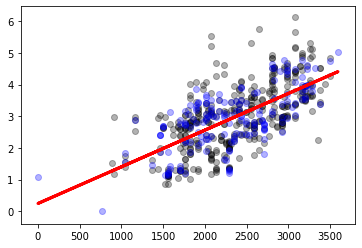

In [18]:
plt.scatter(X_train,y_train,  color='black', alpha = 0.3)
plt.scatter(X_test,y_test,  color='blue', alpha = 0.3)
plt.plot(X,regr.predict(X), linewidth = 3, color = 'red')

In [20]:
from sklearn.metrics import mean_squared_error
print('MSE and R^2 of the model are:', mean_squared_error(predict,y_test), regr.score(X_test,y_test))

MSE and R^2 of the model are: 0.477647929823915 0.45248025794538216


#Moore theory
In the semi-log graph the model looks quite close to Moore's law. With the prediction of 2-fold speed improvement every 2 years, the perfect linear model is supposed to have the slope of log_2(2)/(2*365)~0.001369, while the coef of the model is 0.001158. However, the tiny difference  0.001158-0.001369 = -0.000211 means that after 10 years, the actual speed is 2^(-0.000211*265*10) = 58% of the expected speed by Moore's law. Therefore, Moore's law does not hold in this dataset

Coef and intercept of the model are: [[0.00112576]] [0.32252543]


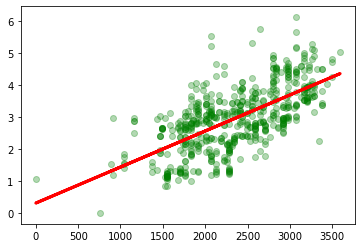

In [21]:
#fit the model on all data
regr_all = linear_model.LinearRegression()
regr_all.fit(X,Y)

print('Coef and intercept of the model are:', regr_all.coef_, regr_all.intercept_)
plt.scatter(X,Y,  color='green', alpha = 0.3)
plt.plot(X,regr_all.predict(X), linewidth = 3, color = 'red')

# Problem 2

In [1]:
#download data
from sklearn import datasets
digits = datasets.load_digits()


In [2]:
#plot some examples
import sklearn
import matplotlib.pyplot as plt 
print(digits.data.shape)
# image showing code from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

(1797, 64)


In [3]:
#K-nearest neigbor
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#filter 3 and 7 data

mask = [label==3 or label==7 for label in digits.target] 
X = data[mask]

# Split data into train and test subsets


y = digits.target[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

#search for the best k of KNN model
parameters = {'n_neighbors':[3,5,7,9]}
classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = classifier,
                             param_grid = parameters, 
                             scoring = 'accuracy', 
                             cv = 10)
# We learn the digits on the first half of the digits
grid_search = grid_search.fit(X_train, y_train)

grid_search.best_params_


{'n_neighbors': 3}

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           3       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        55

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109


Confusion matrix:
[[53  1]
 [ 0 55]]


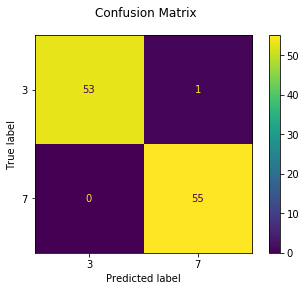

In [5]:
import numpy as np
#assign classifier to KNN model having the optimal K
classifier = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])

# We learn the digits on the first half of the digits
classifier.fit(np.array(X_train), np.array(y_train))

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [35]:
print('Accuracy score is: ', metrics.accuracy_score(predicted, y_test))

Accuracy score is:  0.9908256880733946
